In [187]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

## Read the dataset

In [188]:
df= pd.read_csv(r'Downloads/cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


## Devide data and target

In [189]:
dataset= df.values

data= dataset[:,0:7]
target= dataset[:,7]

## Scalling

In [190]:
#in scalling what we do is foe a give column with various numreical values we give them a value between 1 and 0
from sklearn.preprocessing import MinMaxScaler

target= np.reshape(target,(-1,1))

scaler_data= MinMaxScaler()
scaler_target= MinMaxScaler()

data_scaled= scaler_data.fit_transform(data)
target_scaled= scaler_target.fit_transform(target)

In [191]:
print(data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


In [192]:
print(target_scaled[:10])

[[0.01172333]
 [0.08089097]
 [0.08089097]
 [0.003517  ]
 [0.02461899]
 [0.03399766]
 [0.04806565]
 [0.2028136 ]
 [0.15592028]
 [0.20164127]]


## Why scaling?

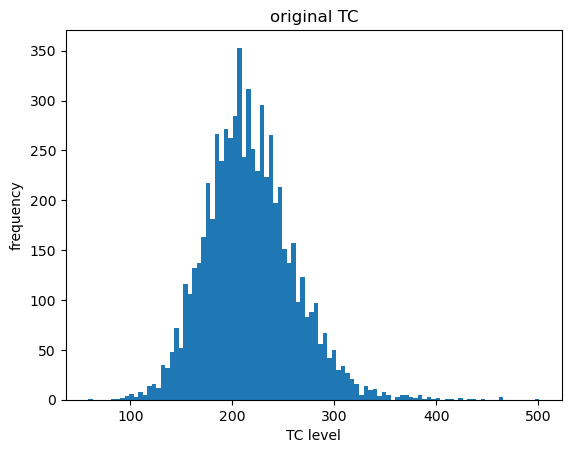

In [193]:
#we can scale as we want range,like (-1,1) or 0-5 or any other range
#we can give this as a parameter ,default value is 0-1

plt.hist(data[:,2],bins=100)
plt.title('original TC')
plt.xlabel('TC level')
plt.ylabel('frequency')
plt.show()



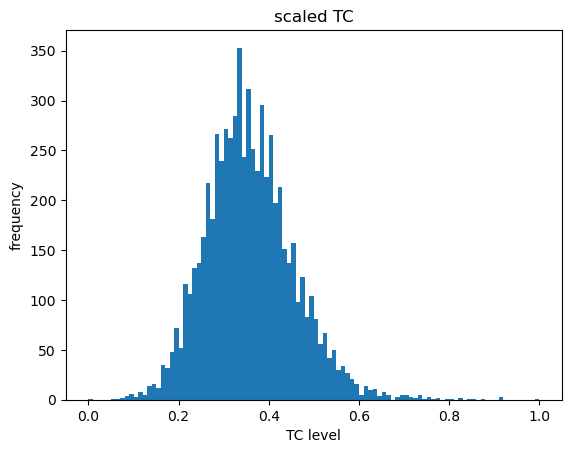

In [194]:
#after scaled
plt.hist(data_scaled[:,2],bins=100)
plt.title('scaled TC')
plt.xlabel('TC level')
plt.ylabel('frequency')
plt.show()

## Other scaling methods

### 1 Standard Scalling

In [195]:
from sklearn.preprocessing import StandardScaler

standard_scaler= StandardScaler()
standard_scaled_data= standard_scaler.fit_transform(data)

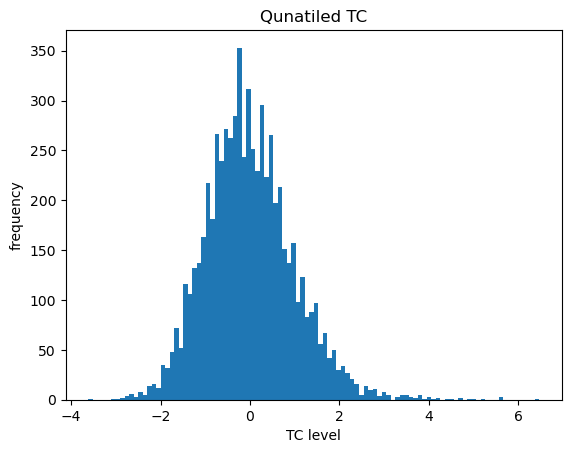

In [196]:
plt.hist(standard_scaled_data[:,2],bins=100)
plt.title('Qunatiled TC')
plt.xlabel('TC level')
plt.ylabel('frequency')
plt.show()

## Quantile Transformation

In [197]:
#some neural network request data for center 0(normal destribution 😁)

from sklearn.preprocessing import QuantileTransformer

qtrans= QuantileTransformer(output_distribution='normal',random_state=0)
quantile_transform_data= qtrans.fit_transform(data)

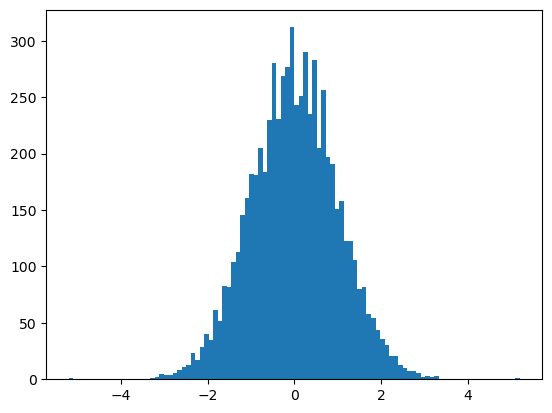

In [198]:
plt.hist(quantile_transform_data[:,2],bins=100)
plt.show()

## Train test split

In [199]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data_scaled,target_scaled,test_size=0.2)

## FFNN architeccture

In [200]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model= Sequential()
#for linear problems we mostly used relu and linear
#but you can try when use activation as sigmoid it give better result than relu here
model.add(Dense(128,input_dim=7,activation='relu'))
#reduce overfitting by droput layers(randomly selected neurons 50% deactivating)
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               1024      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 10)                650       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-traina

In [201]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        predicted_result=model.predict(test_data)
        r2=r2_score(test_target,predicted_result)
        print('epoch:',epoch,'-r2 score:',r2)
#if we want to calculate r2 score after every epoch

In [202]:
from keras.callbacks import ModelCheckpoint
checkpoint= ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

In [203]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint,CustomCallback()])

Epoch 1/200
115/167 [===================>..........] - ETA: 0s - loss: 0.0300 - mse: 0.0300 - mae: 0.1199 

2024-07-19 05:15:06.485896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:06.490517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:06.537124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

INFO:tensorflow:Assets written to: models/model-001.model/assets
42/42 [==============================] - 0s 241us/step
epoch: 0 -r2 score: 0.3795722666348702
167/167 [==============================] - 1s 4ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1106 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0740
Epoch 2/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:07.082971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:07.086989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:07.132674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 247us/step
epoch: 1 -r2 score: 0.5057196029335113
167/167 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0755 - val_loss: 0.0115 - val_mse: 0.0115 - val_mae: 0.0663
Epoch 3/200
110/167 [==================>...........] - ETA: 0s - loss: 0.0100 - mse: 0.0100 - mae: 0.0676INFO:tensorflow:Assets written to: models/model-003.model/assets


2024-07-19 05:15:07.440562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:07.444863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:07.491303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 225us/step
epoch: 2 -r2 score: 0.6197684719370846
167/167 [==============================] - 0s 2ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0659 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0568
Epoch 4/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:07.801556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:07.805748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:07.852511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 221us/step
epoch: 3 -r2 score: 0.6473951347406273
167/167 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0605 - val_loss: 0.0082 - val_mse: 0.0082 - val_mae: 0.0535
Epoch 5/200
108/167 [==================>...........] - ETA: 0s - loss: 0.0071 - mse: 0.0071 - mae: 0.0564INFO:tensorflow:Assets written to: models/model-005.model/assets


2024-07-19 05:15:08.159059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:08.163294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:08.210452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 218us/step
epoch: 4 -r2 score: 0.6985873693196692
167/167 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0559 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0483
Epoch 6/200
42/42 [==============================] - 0s 205us/steposs: 0.0067 - mse: 0.0067 - mae: 0.05
epoch: 5 -r2 score: 0.6912696663447044
167/167 [==============================] - 0s 719us/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0539 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0492
Epoch 7/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:08.639575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:08.643701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:08.689259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 213us/step
epoch: 6 -r2 score: 0.7393970165330841
167/167 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0528 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0451
Epoch 8/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:08.994161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:08.998912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:09.044562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 217us/step
epoch: 7 -r2 score: 0.7689499479254718
167/167 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0510 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0435
Epoch 9/200
42/42 [==============================] - 0s 199us/steposs: 0.0061 - mse: 0.0061 - mae: 0.05
epoch: 8 -r2 score: 0.6998913434411074
167/167 [==============================] - 0s 705us/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0504 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0480
Epoch 10/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:09.468149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:09.473034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:09.519963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 213us/step
epoch: 9 -r2 score: 0.785797234796587
167/167 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0477 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0406
Epoch 11/200
42/42 [==============================] - 0s 199us/steposs: 0.0052 - mse: 0.0052 - mae: 0.04
epoch: 10 -r2 score: 0.7710332350695789
167/167 [==============================] - 0s 703us/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0473 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0422
Epoch 12/200
42/42 [==============================] - 0s 200us/steposs: 0.0057 - mse: 0.0057 - mae: 0.04
epoch: 11 -r2 score: 0.7772094293291171
167/167 [==============================] - 0s 705us/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0470 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0416
Epoch 13/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:10.061441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:10.065529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:10.112310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 210us/step
epoch: 12 -r2 score: 0.8122816123118866
167/167 [==============================] - 0s 2ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0455 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0386
Epoch 14/200
42/42 [==============================] - 0s 199us/steposs: 0.0052 - mse: 0.0052 - mae: 0.04
epoch: 13 -r2 score: 0.735534856341544
167/167 [==============================] - 0s 700us/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0452 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0451
Epoch 15/200
42/42 [==============================] - 0s 203us/steposs: 0.0053 - mse: 0.0053 - mae: 0.04
epoch: 14 -r2 score: 0.8046369629015665
167/167 [==============================] - 0s 703us/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0451 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0381
Epoch 16/200
42/42 [==============================] - 0s 205us/steposs: 0.0044 - mse: 0.0044 - mae: 0.04
epoch: 15 -r2 score: 0.766365790834338
167/167 [

2024-07-19 05:15:10.771511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:10.775815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:10.821916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

INFO:tensorflow:Assets written to: models/model-017.model/assets
42/42 [==============================] - 0s 210us/step
epoch: 16 -r2 score: 0.8380545371694887
167/167 [==============================] - 0s 3ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0438 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0365
Epoch 18/200
42/42 [==============================] - 0s 203us/steposs: 0.0045 - mse: 0.0045 - mae: 0.04
epoch: 17 -r2 score: 0.8204791380013098
167/167 [==============================] - 0s 697us/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0437 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0370
Epoch 19/200
42/42 [==============================] - 0s 199us/steposs: 0.0046 - mse: 0.0046 - mae: 0.04
epoch: 18 -r2 score: 0.8367145160264887
167/167 [==============================] - 0s 701us/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0433 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0369
Epoch 20/200
42/42 [==============================] - 0s 202us/steposs: 0.0046 - mse: 0

2024-07-19 05:15:11.877199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:11.881290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:11.928202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 215us/step
epoch: 22 -r2 score: 0.8478196841529754
167/167 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0426 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0363
Epoch 24/200
42/42 [==============================] - 0s 203us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch: 23 -r2 score: 0.8413213171548167
167/167 [==============================] - 0s 698us/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0414 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0366
Epoch 25/200
42/42 [==============================] - 0s 200us/steposs: 0.0042 - mse: 0.0042 - mae: 0.04
epoch: 24 -r2 score: 0.8007563872958193
167/167 [==============================] - 0s 698us/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0422 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0387
Epoch 26/200
 1/42 [..............................] - ETA: 0s

2024-07-19 05:15:12.465849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:12.470188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:12.516906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 216us/step
epoch: 25 -r2 score: 0.853292478519911
167/167 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0417 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0367
Epoch 27/200
42/42 [==============================] - 0s 197us/steposs: 0.0041 - mse: 0.0041 - mae: 0.04
epoch: 26 -r2 score: 0.8470937561170478
167/167 [==============================] - 0s 708us/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0410 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0355
Epoch 28/200
42/42 [==============================] - 0s 200us/steposs: 0.0040 - mse: 0.0040 - mae: 0.04
epoch: 27 -r2 score: 0.8380399281989735
167/167 [==============================] - 0s 704us/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0415 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0354
Epoch 29/200
42/42 [==============================] - 0s 206us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch: 28 -r2 score: 0.8335641230147839
167/167 

2024-07-19 05:15:13.649003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:13.653032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:13.699275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 215us/step
epoch: 33 -r2 score: 0.862631169880829
167/167 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0404 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0347
Epoch 35/200
42/42 [==============================] - 0s 200us/steposs: 0.0039 - mse: 0.0039 - mae: 0.04
epoch: 34 -r2 score: 0.832605786693973
167/167 [==============================] - 0s 702us/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0400 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0357
Epoch 36/200
42/42 [==============================] - 0s 199us/steposs: 0.0038 - mse: 0.0038 - mae: 0.03
epoch: 35 -r2 score: 0.8520332714581796
167/167 [==============================] - 0s 701us/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0395 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0364
Epoch 37/200
42/42 [==============================] - 0s 200us/steposs: 0.0036 - mse: 0.0036 - mae: 0.03
epoch: 36 -r2 score: 0.857752205128289
167/167 [=

2024-07-19 05:15:16.535569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:16.539660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-07-19 05:15:16.586451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2024-07-19 05:15:

42/42 [==============================] - 0s 211us/step
epoch: 55 -r2 score: 0.8649657326503177
167/167 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0385 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0337
Epoch 57/200
42/42 [==============================] - 0s 197us/steposs: 0.0035 - mse: 0.0035 - mae: 0.03
epoch: 56 -r2 score: 0.8523922043082144
167/167 [==============================] - 0s 706us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0385 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0347
Epoch 58/200
42/42 [==============================] - 0s 197us/steposs: 0.0036 - mse: 0.0036 - mae: 0.03
epoch: 57 -r2 score: 0.8432403666032755
167/167 [==============================] - 0s 703us/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0388 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0346
Epoch 59/200
42/42 [==============================] - 0s 200us/steposs: 0.0037 - mse: 0.0037 - mae: 0.03
epoch: 58 -r2 score: 0.8556239031214126
167/167

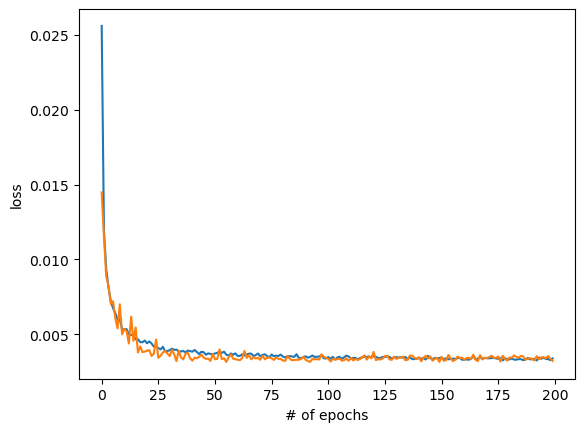

In [204]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.show()
#here in regression problem we only look for loss,we cant look for accuracy

#solutions for overfitting
#overfitting means for the testing data after some points the prediction error will increase,that point we say optimal
solutions for overfitting
1early stopping
2dropout layers
3batch normalization
4regularization
5reduce the complexity-parameters reduce krnn puluwan
6data augmentation-artificially making which means by existing images we make new images

## R2 ScORE

In [205]:
#In regression problems we measure r2 instead of accuracy
#like classification accuracy when accuracy reach 1 it is good,likewise when r2 reach 1 it is good
#we get r2 by comparing the test target with predicted results

In [206]:
from sklearn.metrics import r2_score

predicted_result= model.predict(test_data)
r2= r2_score(test_target,predicted_result)
print('r2 score:',r2)

42/42 [==============================] - 0s 343us/step
r2 score: 0.8620184624535409


In [207]:
print('actual:', test_target[:10].T)
print('predicted:', predicted_result[:10].T)
#these are scaled values, we have to convert this to actual values

actual: [[0.07971864 0.33411489 0.28487691 0.42907386 0.014068   0.01172333
  0.19109027 0.09495897 0.00117233 0.06213365]]
predicted: [[0.07344096 0.31370014 0.3006565  0.39457297 0.01564573 0.01898108
  0.31700057 0.10175339 0.00933854 0.04215856]]


In [208]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[ 6.9 28.6 24.4 36.7  1.3  1.1 16.4  8.2  0.2  5.4]]
predicted inverse scaled: [[ 6.364514  26.858622  25.745998  33.757076   1.4345812  1.7190858
  27.140148   8.779564   0.8965777  3.6961248]]


In [209]:
#get one raw
test_data=np.array([0,63,186,46,1,1,0]).reshape(1,-1)

In [210]:
scaled_test_data= scaler_data.transform(test_data)

In [211]:
result= model.predict(scaled_test_data)
print(result)

1/1 [==============================] - 0s 15ms/step
[[0.23137209]]


In [212]:
scaler_target.inverse_transform(result)

array([[19.836039]], dtype=float32)

## Save all the models

In [213]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']